# Binary Image

Processing of images with one object

In [6]:
import cv2
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt, atan2, sin, cos, tan


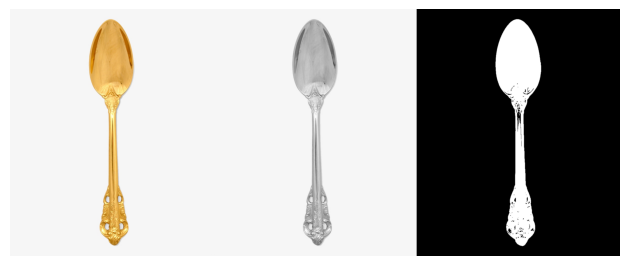

In [49]:
file = 'C:/Users/gerag/Desktop/Coursera/Fisrt Principles of Computer Vision/Camera and Imaging/BinaryImages/spoon.png'
img = cv2.cvtColor(cv2.imread(file),cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_blackandwhite = cv2.bitwise_not(cv2.threshold(img_gray, 230, 255, cv2.THRESH_BINARY)[1]) #Invert color
img_bw =img_blackandwhite/255

concat = np.concatenate((img, cv2.cvtColor(img_gray,cv2.COLOR_GRAY2BGR),
                         cv2.cvtColor(img_blackandwhite,cv2.COLOR_GRAY2BGR)), axis=1)

plt.imshow(concat)
plt.grid(False)
plt.axis('off')
plt.rcParams["figure.autolayout"] = True
plt.show()

### Area of the object (zeroth moment)


$$ A = \sum_{i=1}^{n} \sum_{j=1}^{m} b_{ij}$$

Where **n** and **m** are the size of the image.

In [50]:
n , m = img_bw.shape

A = np.sum(np.sum(img_bw))
print("The area of the image is {}, while its height is {} and its width is {}".format(int(A),n,m))

The area of the image is 77846, while its height is 996 and its width is 820


### Center of area (position)

Position ($\bar{x},\bar{y}$) of the object

 $$ \bar{x} = \frac{1}{A} \sum_{i=1}^{n} \sum_{j=1}^{m} i b_{ij} $$
 $$ \bar{y} = \frac{1}{A} \sum_{i=1}^{n} \sum_{j=1}^{m} j b_{ij} $$

The center of the object is (418.7467692623899,412.41426662898544)


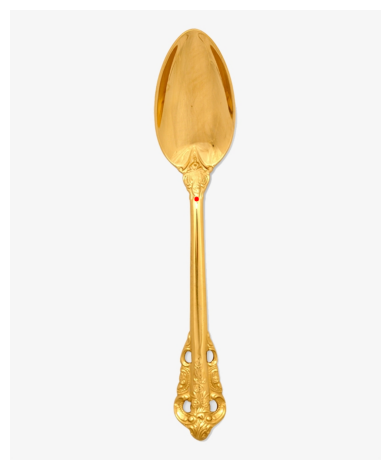

In [55]:
x_bar = 0
y_bar = 0

for i in range(n):
    for j in range(m):
        x_bar = x_bar + i * img_bw[i,j]
        y_bar = y_bar + j * img_bw[i,j]
        
x_bar *=  1/A
y_bar *=  1/A       
        
print("The center of the object is ({},{})".format(x_bar,y_bar))

center = cv2.circle(cv2.cvtColor(img,cv2.COLOR_RGB2BGR), (int(y_bar),int(x_bar)), 
                    radius=5, color=(0, 0, 255), thickness=-1)

plt.imshow(cv2.cvtColor(center,cv2.COLOR_RGB2BGR))
plt.grid(False)
plt.axis('off')
plt.rcParams["figure.autolayout"] = True
plt.show()

### Second Moments
#### With respect to origin

$$a' = \sum_{i=1}^{n} \sum_{j=1}^{m} i^2 b_{ij}$$
$$b' = 2\sum_{i=1}^{n} \sum_{j=1}^{m} ij b_{ij}$$
$$c' = \sum_{i=1}^{n} \sum_{j=1}^{m} j^2 b_{ij}$$

In [56]:
a_ = 0
b_ = 0
c_ = 0

x_plot = 0
y_plot = 0

for i in range(n):
    for j in range(m):
        a_ += i**2 * img_bw[i,j]
        b_ += i*j  * img_bw[i,j]
        c_ += j**2 * img_bw[i,j]
        
b_ *= 2

print("a_ = {}, b_ = {}, c_ = {} ".format(a_,b_,c_))

a_ = 19690421599.0, b_ = 27100532338.0, c_ = 13353182355.0 


#### Image Moments

$$ M_{p,q} =  \sum_{i=1}^{n} \sum_{j=1}^{m} i^p j^q I(i,j)$$

Where M(0,0) is the Area of the Image

We can obtain the centers by:
 $\bar{x} = \frac{M_{1,0}}{M_{0,0}}$ and $\bar{y} = \frac{M_{0,1}}{M_{0,0}}$
 
and the second moments by:

$$\mu_{2,0}' = a = \frac{M_{2,0}}{M_{0,0}} - \bar{x}^2$$  
$$\mu_{1,1}' = b = \frac{M_{1,1}}{M_{0,0}} - \bar{x}\bar{y}$$   
$$\mu_{0,2}' = c = \frac{M_{0,2}}{M_{0,0}} - \bar{y}^2$$

And the covariance matrix of the binary object would be:

$$ cov(Obj) = \begin{bmatrix}
\mu_{2,0}' & \mu_{1,1}'\\
\mu_{1,1}' & \mu_{0,2}'
\end{bmatrix}$$


In [57]:
M = np.zeros((3,3))

M = [[sum([i**p * j**q * img_bw[i,j] for i in range(n) for j in range(m)]) 
    for p in range(3)] for q in range(3)] #Zeroth to second order

Area = M[0][0]
row = M[1][0]/M[0][0]
column = M[0][1]/M[0][0]

#Covariance matrix
Cov = np.zeros((2,2))


Cov[0,0] = a_ = M[2][0]/M[0][0] - row**2                 # mu' 2,0 or a
Cov[0,1] = b_ = Cov[1,0] = 2*(M[1][1]/M[0][0] - row*column)   # mu' 1,1 or b
Cov[1,1] = c_ = M[0][2]/M[0][0] - column**2                 # mu' 0,2 or c

print("Area = {}, x_c = {} , y_c = {}".format(Area, x_bar, y_bar))
print("a_ = {}, b_ = {}, c_ = {} ".format(Cov[0,0],Cov[0,1],Cov[1,1] ))

Area = 77846.0, x_c = 418.7467692623899 , y_c = 412.41426662898544
a_ = 1447.7865955281013, b_ = 2735.7724851131206, c_ = 77591.84152124028 


#### Orientation
$$\theta = \frac{1}{2} tan^{-1}\left( \frac{2\mu_{1,1}'}{\mu_{2,0}' - \mu_{0,2}'} \right)$$

#### Mayor and Minor axis

$$max = \sqrt{ 8  \left( a + c + \sqrt{4b^2 + (a - c)^2}\right)^2 }$$
$$min = \sqrt{ 8  \left( a + c - \sqrt{4b^2 + (a - c)^2}\right)^2 }$$

#### Roundedness
$$R = \frac{min}{max} , [0,1]$$

#### Orientation axis
$$p = \bar{y}cos(\theta) - \bar{x}sin(\theta)$$


In [58]:
theta = 1/2 * atan2(2*Cov[0,1], Cov[0,0] - Cov[1,1])

max_ = 0
min_ = 0

try:
    max_ = sqrt( 8*( a_ + c_ + sqrt(4*b_**2 + (a_-c_)**2) ) )
    min_ = sqrt( 8*( a_ + c_ - sqrt(4*b_**2 + (a_-c_)**2) ) )
except:
    print("Error")

R = min_/max_

print("Orientation: {}(deg: {}) \nmin_: {}, max_: {} \nRoundedness: {}"
      .format(theta, np.rad2deg(theta),min_, max_,R))

Orientation: 1.5349290714810535(deg: 87.94495764779862) 
min_: 146.9486901389728, max_: 1114.917096619625 
Roundedness: 0.13180234708438338


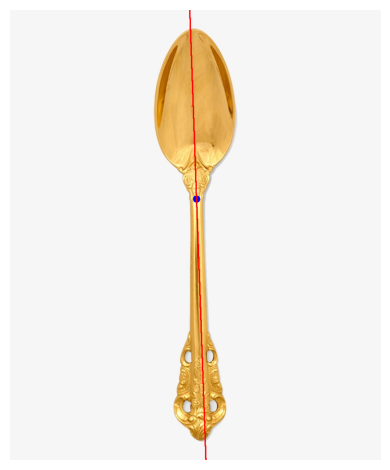

In [60]:
p = -column*cos(theta) + row*sin(theta)
xy = [[int((i*cos(theta)+p)/sin(theta)),i] for i in range(n)]
xy = np.array(xy)
xy = xy.reshape((-1,1,2))


center = cv2.circle(cv2.cvtColor(img,cv2.COLOR_RGB2BGR), (int(row),int(column)), 
                    radius=8, color=(255, 0, 0), thickness=-1)

image = cv2.polylines(center, [xy], False, (0, 0, 255), 2)

plt.imshow(cv2.cvtColor(image,cv2.COLOR_RGB2BGR))
plt.grid(False)
plt.axis('off')
plt.rcParams["figure.autolayout"] = True
plt.show()